# 과제 - Pima indians 당뇨병 데이터

1. 결정트리와 SVM으로 학습하고 예측을 수행한 후 각각 혼돈행렬, 정확도, 정밀도, 재현율, f1스코어를 계산하시오
2. 결정 트리에서 max_depth, min_samples_split, min_samples_leaf 값을 하나씩 선택해서 tree 글미을 그려보세요.
3. 두가지 모델에 대해서 GridSearchCV 를 사용해서 best가 되는 경우의 파라미터 값과 그때의 정확도를 계산하시오.

( 과제는 주피터 노트북으로 작성한 후 HTML로 변환하여 본인의 이름.html로 변경한 후 MLP에 제출하기 ) 

## 1. 결정트리와 SVM으로 학습하고 예측을 수행한 후 각각 혼돈행렬, 정확도, 정밀도, 재현율, f1스코어를 계산하시오


In [1]:
import numpy as np
import pandas as pd

In [2]:
# 데이터 불러오기 
df = pd.read_csv('pima-indians-diabetes.csv', skiprows=9, header=None)
df.columns = ['P','G','BP','S','I','BMI','D','Age','Class']
print(df.shape)
df.head(3)

(768, 9)


,P,G,BP,S,I,BMI,D,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2022)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(768, 8) (768,)
(614, 8) (154, 8) (614,) (154,)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # 결정트리
from sklearn.svm import SVC # SCV

# 학습
dtc = DecisionTreeClassifier(random_state=2022).fit(X_train, y_train)
#dtc.fit(X_train, y_train)

svc = SVC(random_state=2022).fit(X_train, y_train)
#svc.fit(X_train, y_train)

# 예측
pred_dtc = dtc.predict(X_test)
pred_svc = svc.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score  # 정확도, 정밀도, 재현율
from sklearn.metrics import f1_score, confusion_matrix # 오차행렬, f1

In [34]:
A = ['DecisionTreeClassifier', 'SVC']
pred = [pred_dtc, pred_svc]
for a, i in zip(A, pred):
  confusion = confusion_matrix( y_test, i)        # 오차 행렬
  accuracy = accuracy_score(y_test , i)           # 정확도
  precision = precision_score(y_test , i)         # 정밀도
  recall = recall_score(y_test , i)               # 재현율
  f1 = f1_score(y_test,i)                         # f1 score
  
  print('='*10,a,'='*10 )
  print('오차 행렬:',confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f} '\
        .format(accuracy, precision, recall, f1), '\n') 


========== DecisionTreeClassifier ==========
오차 행렬: [[74 26]
 [21 33]]
정확도: 0.6948, 정밀도: 0.5593, 재현율: 0.6111, F1: 0.5841  

========== SVC ==========
오차 행렬: [[85 15]
 [25 29]]
정확도: 0.7403, 정밀도: 0.6591, 재현율: 0.5370, F1: 0.5918  



##2. 결정 트리에서 max_depth, min_samples_split, min_samples_leaf 값을 하나씩 선택해서 tree 그림을 그려보세요.

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

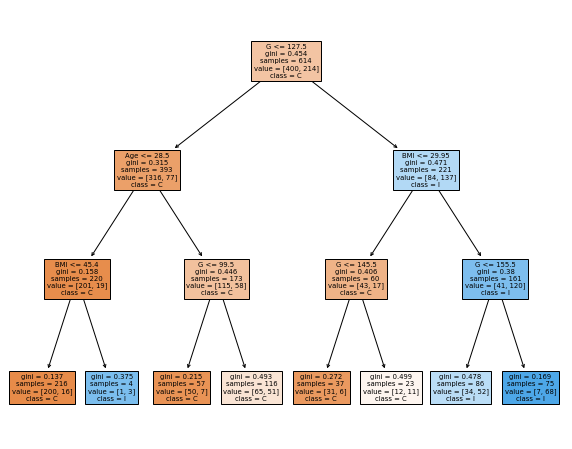

In [10]:
# max_depth=3
dtc2 = DecisionTreeClassifier(max_depth=3 , random_state=156).fit(X_train, y_train)
#dtc2.fit(X_train, y_train)
plt.figure(figsize=(10, 8))
plot_tree(dtc2, feature_names=X.columns, class_names = 'Class', filled=True)
plt.show()

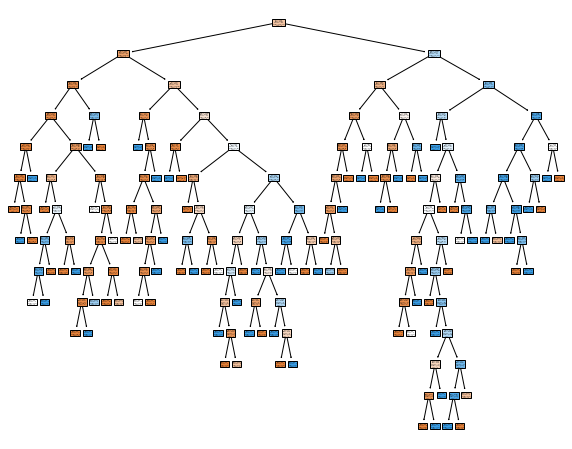

In [11]:
# min_samples_split = 4
dtc3 = DecisionTreeClassifier(min_samples_split = 4 , random_state=156).fit(X_train, y_train)
#dtc3.fit(X_train, y_train)
plt.figure(figsize=(10, 8))
plot_tree(dtc3, feature_names=X.columns, class_names = 'Class', filled=True)
plt.show()

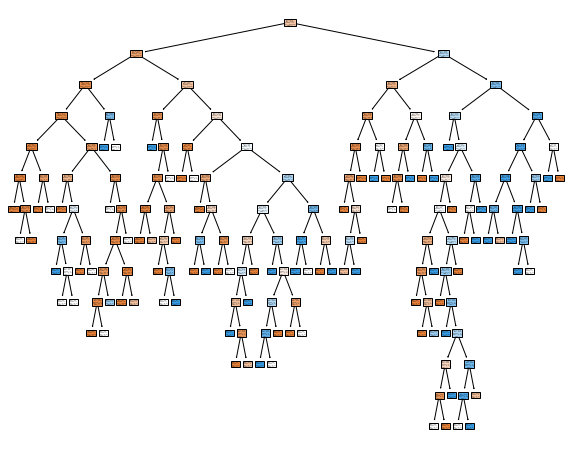

In [12]:
# min_samples_leaf = 2
dtc4 = DecisionTreeClassifier(min_samples_leaf = 2 , random_state=156).fit(X_train, y_train)
#dtc4.fit(X_train, y_train)
plt.figure(figsize=(10, 8))
plot_tree(dtc4, feature_names=X.columns, class_names = 'Class', filled=True)
plt.show()

## 3. 두가지 모델에 대해서 GridSearchCV 를 사용해서 best가 되는 경우의 파라미터 값과 그때의 정확도를 계산하시오.

In [18]:
from sklearn.model_selection import GridSearchCV
# dtc
params_dtc = {'max_depth':[2,4,6,8], 'min_samples_split':[2,4,6], 'min_samples_leaf':[2,4,6,8,10]}
# svc
params_scv = {'C':[0.01, 0.1,1,10,100 ]}

In [19]:
 f = [dtc, svc]
 params = [params_dtc, params_scv]
 for i,p in zip(f, params):
  grid = GridSearchCV(i, p, scoring='accuracy', cv=5).fit(X_train, y_train)
  #grid.fit(X_train, y_train)
  if i == dtc:
    print('DecisionTreeClassifier_best params:' , grid.best_params_)
    print('DecisionTreeClassifier_score:' ,grid.score(X_test, y_test), '\n')
  else: 
    print('SVC_best params:', grid.best_params_)
    print('SVC_score:' , grid.score(X_test, y_test))
  #print(grid.best_params_)
  

DecisionTreeClassifier_best params: {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}
DecisionTreeClassifier_score: 0.7077922077922078 

SVC_best params: {'C': 1}
SVC_score: 0.7402597402597403
